<a href="https://colab.research.google.com/github/JosePabloGFnl/Redes-Neuronales-Artificiales/blob/main/RegresionLinealEjemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#usaremos el archivo cargado, weight-height.csv
#nos estamos basando en este artículo: https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c

In [ ]:
import pandas as pd

# leer la base de datos
df = pd.read_csv('weight-height.csv')

# imprimir las primeras 5 filas
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


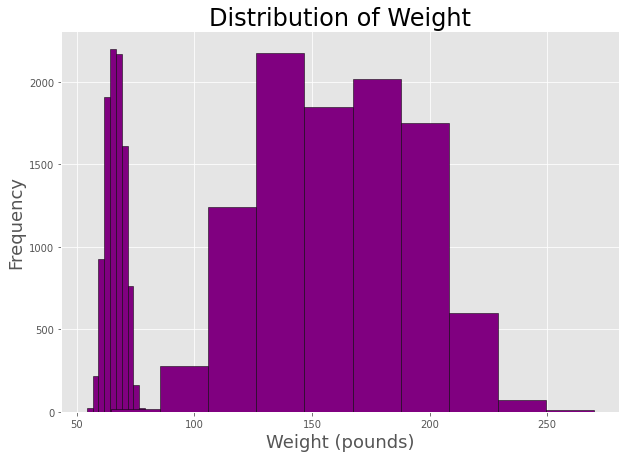

In [ ]:
#vamos a analizar la estadística

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# histograma de la estatura
df.Height.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18)

# histograma del peso
df.Weight.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18);

In [ ]:
#no veremos tanto de lo que dice al inicio del artículo, queremos ver regresión lineal por el momento

In [ ]:
#---Regresión Lineal---
#usaremos polyfit para ajuste poninominal variado

import numpy as np

# los mejores ajustes polinominales

#df = la variable en donde se guarda la base de datos
#                 es una columna de la base de datos
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']

# hombres
male_fit = np.polyfit(df_males.Height, df_males.Weight, 1)
# array([   5.96177381, -224.49884071])

# mujeres
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)
# array([   5.99404661, -246.01326575])

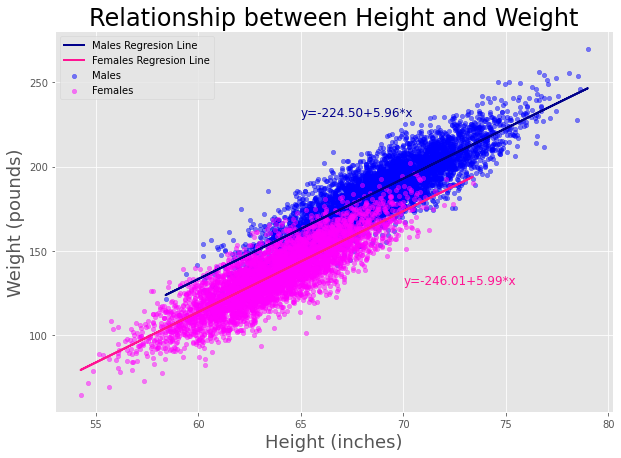

In [ ]:
#para darle forma al plot

# dataframes de hombres y mujeres
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']

# buscar en plots
ax1 = df_males.plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7), ax=ax1)

# líneas de regresión
plt.plot(df_males.Height, male_fit[0] * df_males.Height + male_fit[1], color='darkblue', linewidth=2)
plt.plot(df_females.Height, female_fit[0] * df_females.Height + female_fit[1], color='deeppink', linewidth=2)

# ecuaciones de regresión
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]), color='darkblue', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(female_fit[1], female_fit[0]), color='deeppink', size=12)

# leyenda, títulos y etiquetas
plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In [3]:
#otro ejemplo 01/02/2022
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


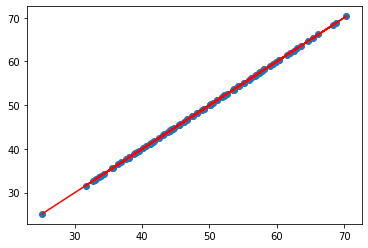

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

#data =pd.read_csv('data.csv') por si uso una máquina local
import io

data = pd.read_csv(io.BytesIO(uploaded['data.csv']))

#el set de datos se guarda en pandas
X = data.iloc[:, 0].values.reshape(-1, 1) #los valores se convierten en un arreglo de numpy
Y = data.iloc[:, 0].values.reshape(-1, 1) #-1 significa calcular la dimensión de filas

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y) #un método que requiere saber quiénes son las extradas y salidas para hacer un aprendizaje supervisado, requiere a fuerzas una variable de salida Y
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red') #y_pred es la línea prognosticada por el modelo
plt.show()